In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import warnings 
warnings. filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 

import matplotlib.pyplot as plt 


In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
X=iris.data
y=iris.target

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("accuracy_score: ",accuracy_score(y_test,y_pred))


accuracy_score:  1.0


In [7]:
y=iris.target

In [8]:
y_pred_prob=lr.predict_proba(X_test)
y_pred_prob=y_pred_prob[:,1]
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



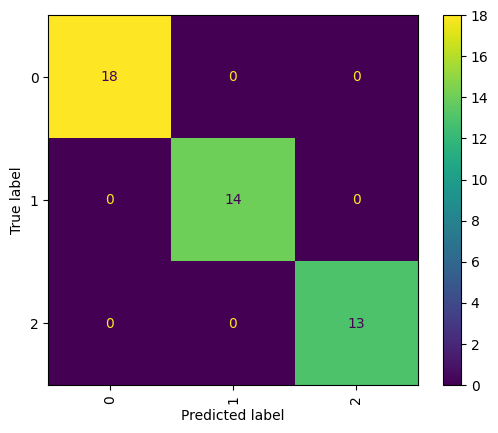

In [9]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot() 
plt.xticks(rotation=90)
plt.show() 

In [10]:
#loss

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
params={'penalty':['l1','l2','elasticnet',None],
        'l1_ratio':np.linspace(0.1,5),
        'solver':['lbfgs','newton-cholesky','saga','sag','liblinear','newton-cg']}

gcv=GridSearchCV(lr,param_grid=params,cv=kfold,scoring='neg_log_loss')
gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)


{'l1_ratio': 0.4, 'penalty': None, 'solver': 'sag'}
-0.08846583221891655


In [11]:
# using roc /AUC curve 
# this is multiclass problem so AUC is not applicable for this problem 
#y_pred_prob=lr.predict_proba(X_test)
#y_pred_prob=y_pred_prob[:,1] 
#op=roc_curve(y_test,y_pred_prob)
#fpr,tpr,thres=op 
#plt.plot(fpr,tpr)
#plt.scatter(fpr,tpr,c='red')
#plt.xlabel("1-specificity")
#plt.show()

#print("Area under the curve",roc_auc_curve(y_test,y_pred_prob))

In [12]:

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

params={'penalty':['l1','l2','elasticnet',None],
        'l1_ratio':np.linspace(0,1,5),
        'solver':['lbfgs','newton-cholesky','saga','sag','liblinear','newton-cg'],
        'multi_class':['ovr','multinomial']}

gcv=GridSearchCV(lr, param_grid=params,cv=kfold,scoring='f1_macro')
gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)

{'l1_ratio': 0.0, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}
0.9866332497911445


In [14]:
import seaborn as sns 

In [15]:
df2=pd.read_csv("C:\\my_files\\word files\\Desktop\\codes\\AdvanceAnalytics\\Datasets\\diamonds.csv")

In [16]:
df2.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [17]:
d=pd.get_dummies(df2)

In [18]:
X=d.drop(['price'],axis=1)

In [19]:
y=d['price']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [21]:
lr=LogisticRegression()

In [ ]:
X_train.shape 

In [ ]:
y_pred=lr.predicted(X_test)